In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
# from scipy.misc import imread
import codecs
from IPython.display import HTML
# from matplotlib_venn import venn2
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [34]:
response = pd.read_csv('/Users/jihunkang/My Drive/Colab Notebooks/Kaggle_Handcopy/Lvl1-3/multipleChoiceResponses.csv', encoding='ISO-8859-1')

In [35]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [37]:
print('The total number of respondents:', response.shape[0])
print('Total number of Countries with respondents:', response['Country'].nunique())
print('Country with highest respondents:', response['Country'].value_counts().index[0], 'with', response['Country'].value_counts().values[0], 'respondents.')
print('Youngest respondent:', response['Age'].min(), ' and Oldest respondent:', response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents.
Youngest respondent: 0.0  and Oldest respondent: 100.0


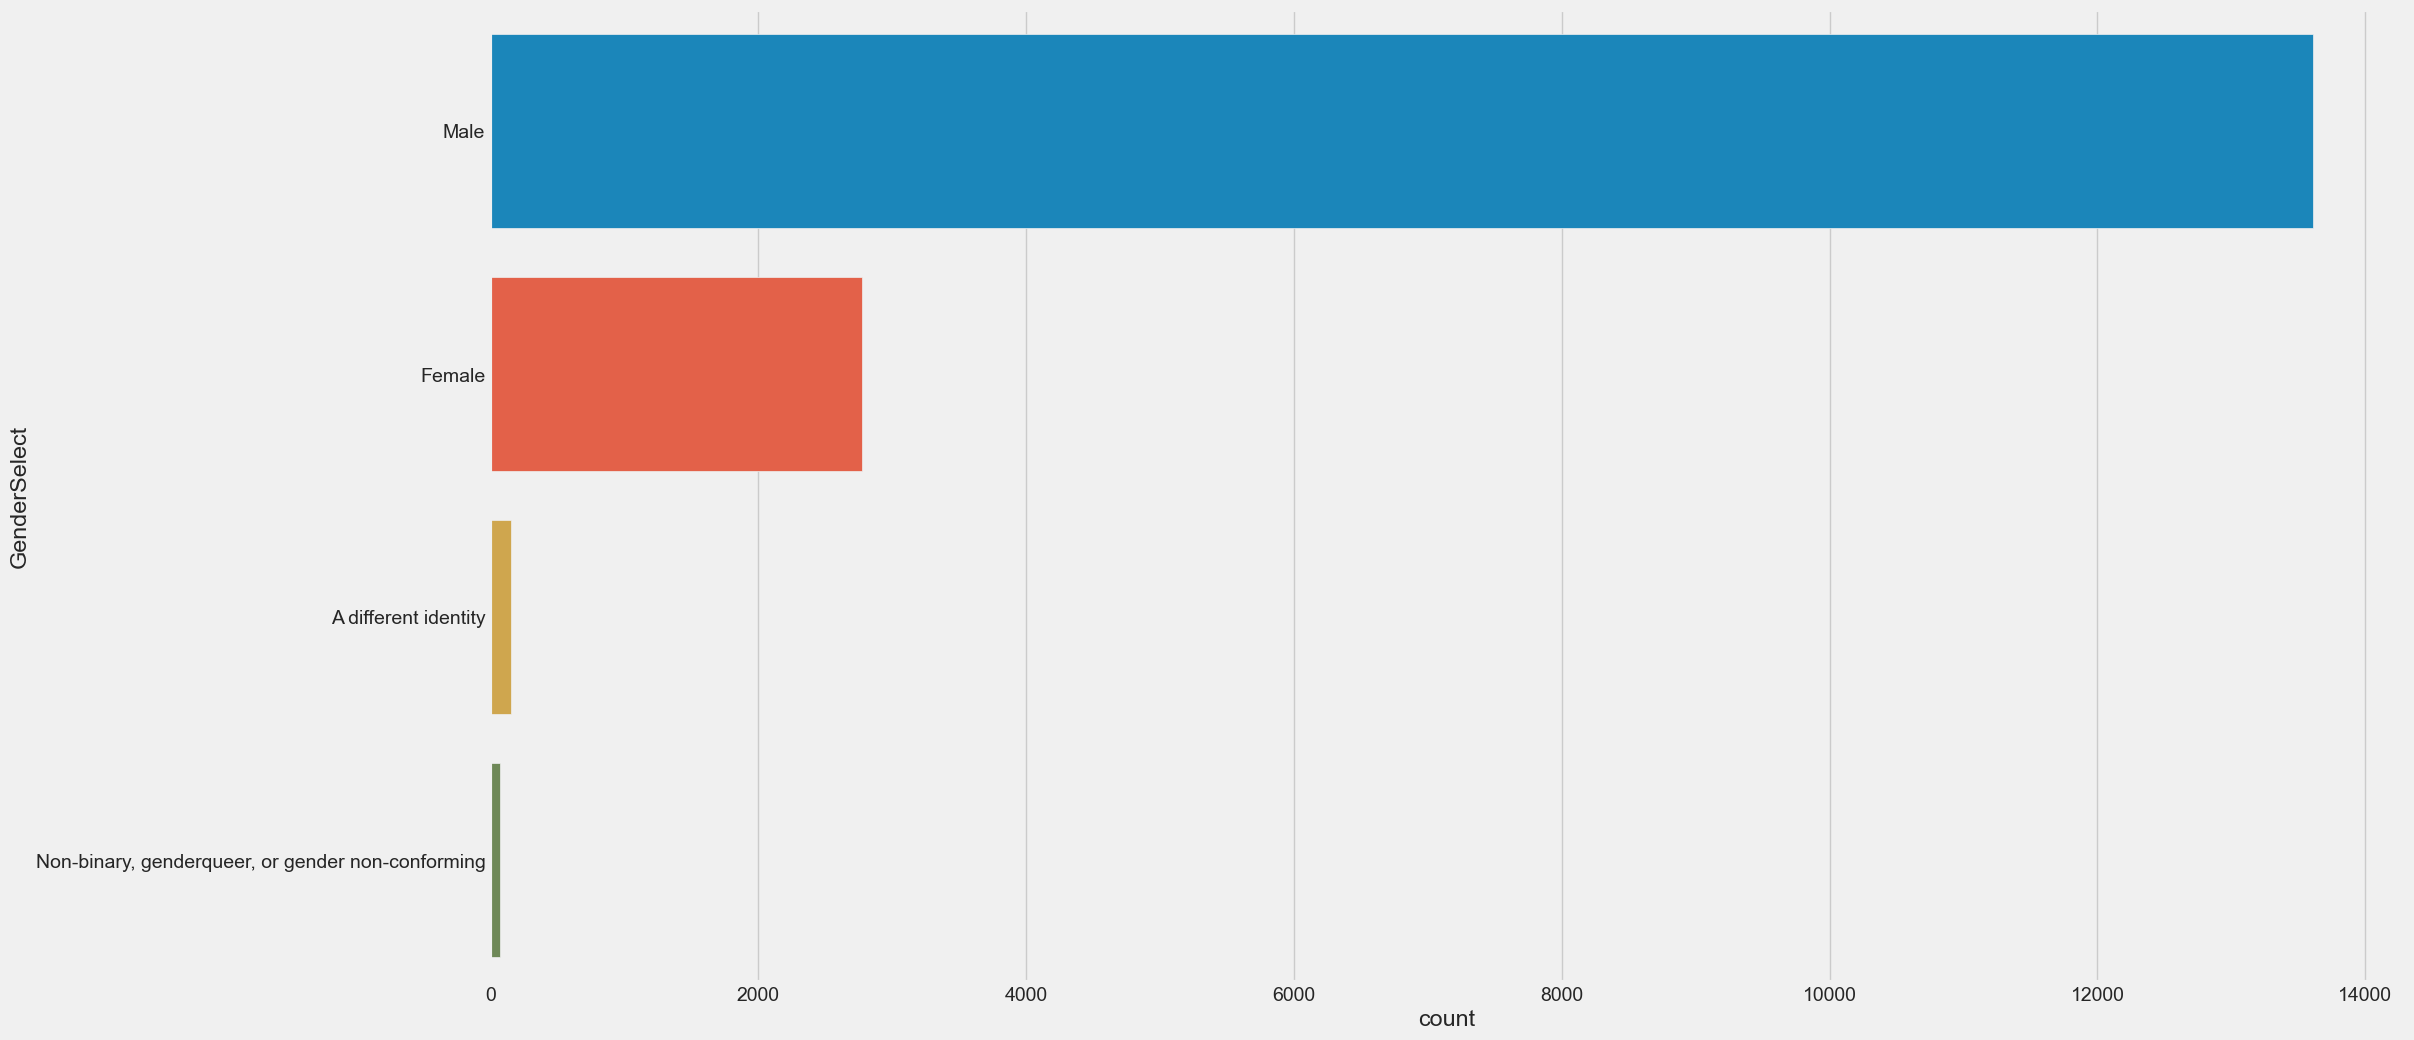

In [38]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['GenderSelect'],
              order=response['GenderSelect'].value_counts().index)
plt.show()

In [39]:
response['GenderSelect'].value_counts().index

Index(['Male', 'Female', 'A different identity',
       'Non-binary, genderqueer, or gender non-conforming'],
      dtype='object')

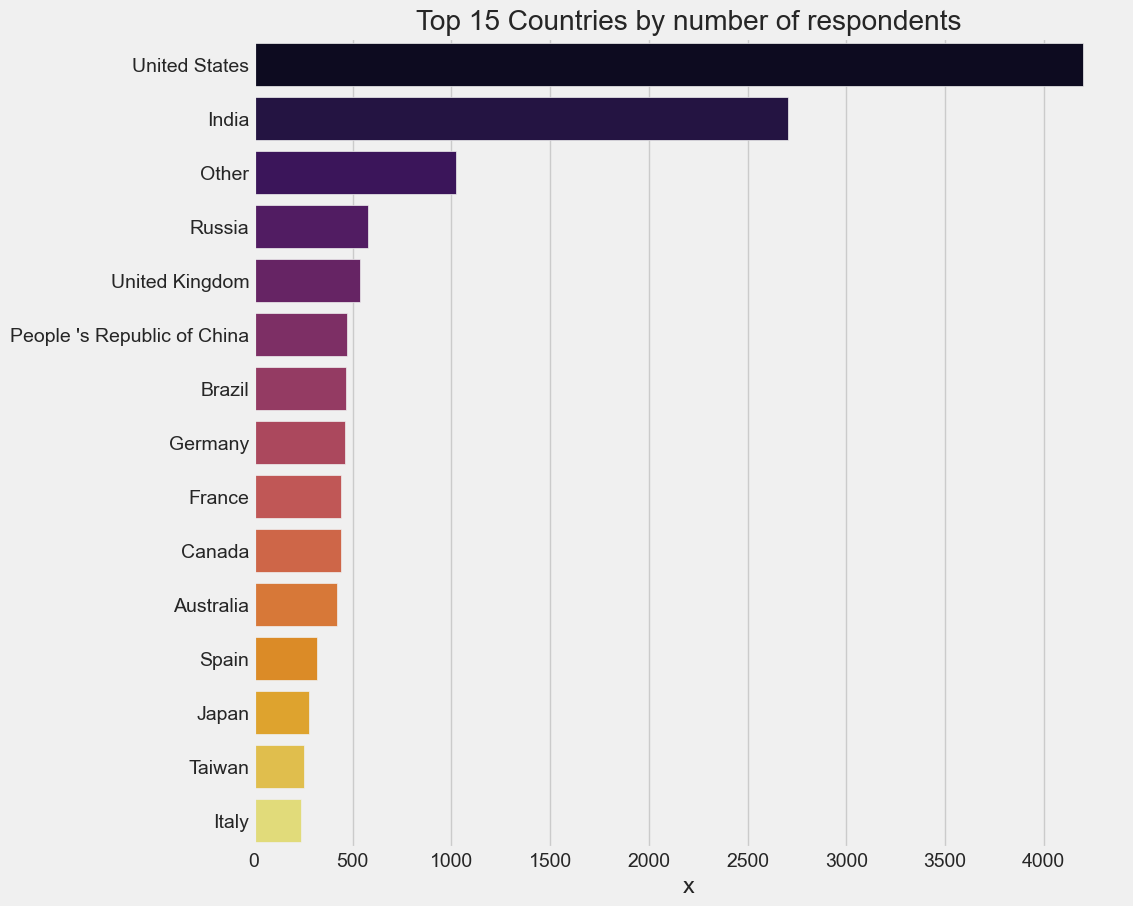

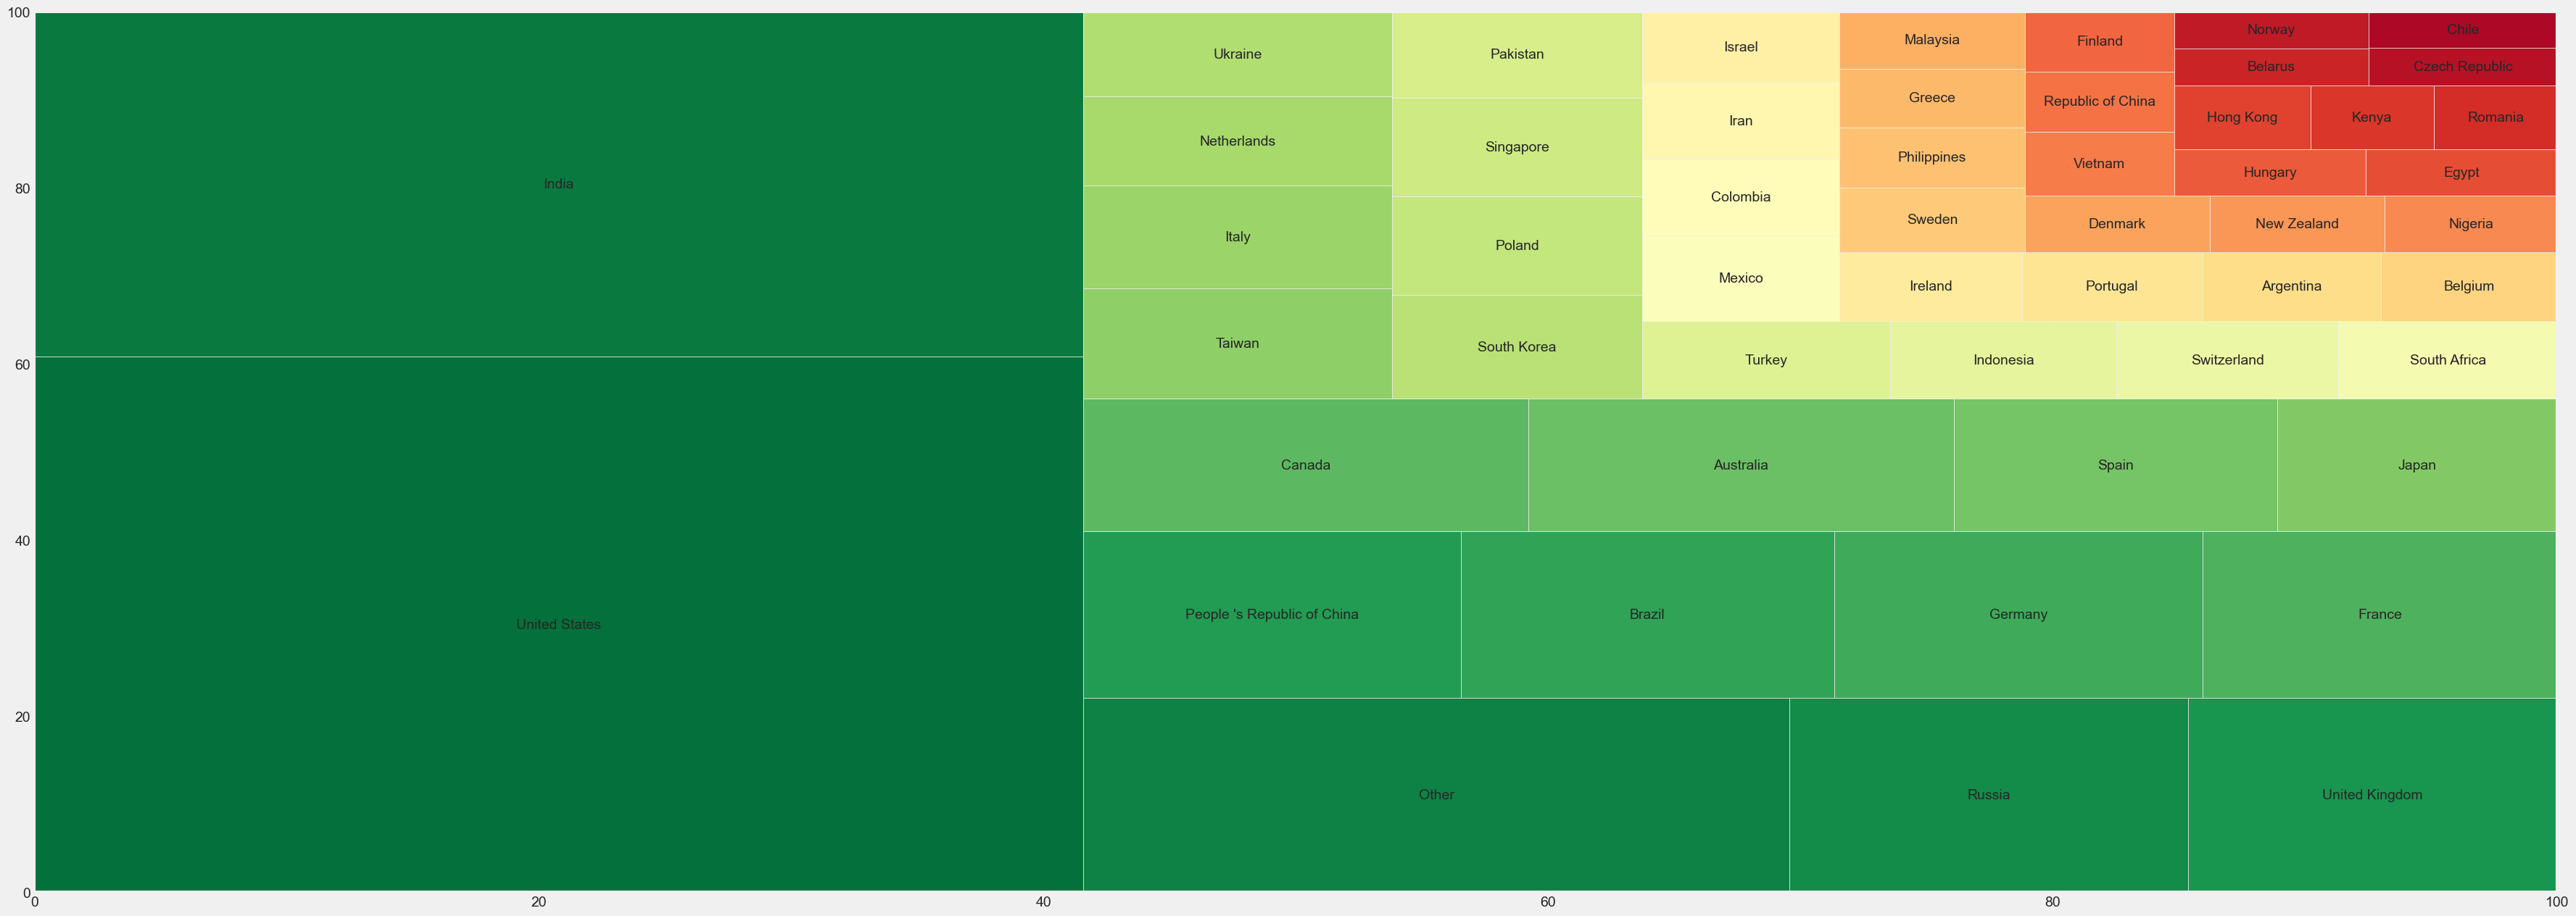

In [40]:
resp_coun = response['Country'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Country'], resp_coun.index, palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('x')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

tree = response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values, label=tree.index,
              color=sns.color_palette('RdYlGn_r', 52))
plt.rcParams.update({'font.size': 20})
fig = plt.gcf()
fig.set_size_inches(40,15)
plt.show()

In [41]:
response['CompensationAmount'] = response['CompensationAmount'].str.replace(',','')
response['CompensationAmount'] = response['CompensationAmount'].str.replace('-','')

rates = pd.read_csv('/Users/jihunkang/My Drive/Colab Notebooks/Kaggle_Handcopy/Lvl1-3/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)

salary = response[['CompensationAmount', 'CompensationCurrency', 'GenderSelect', 'Country', 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


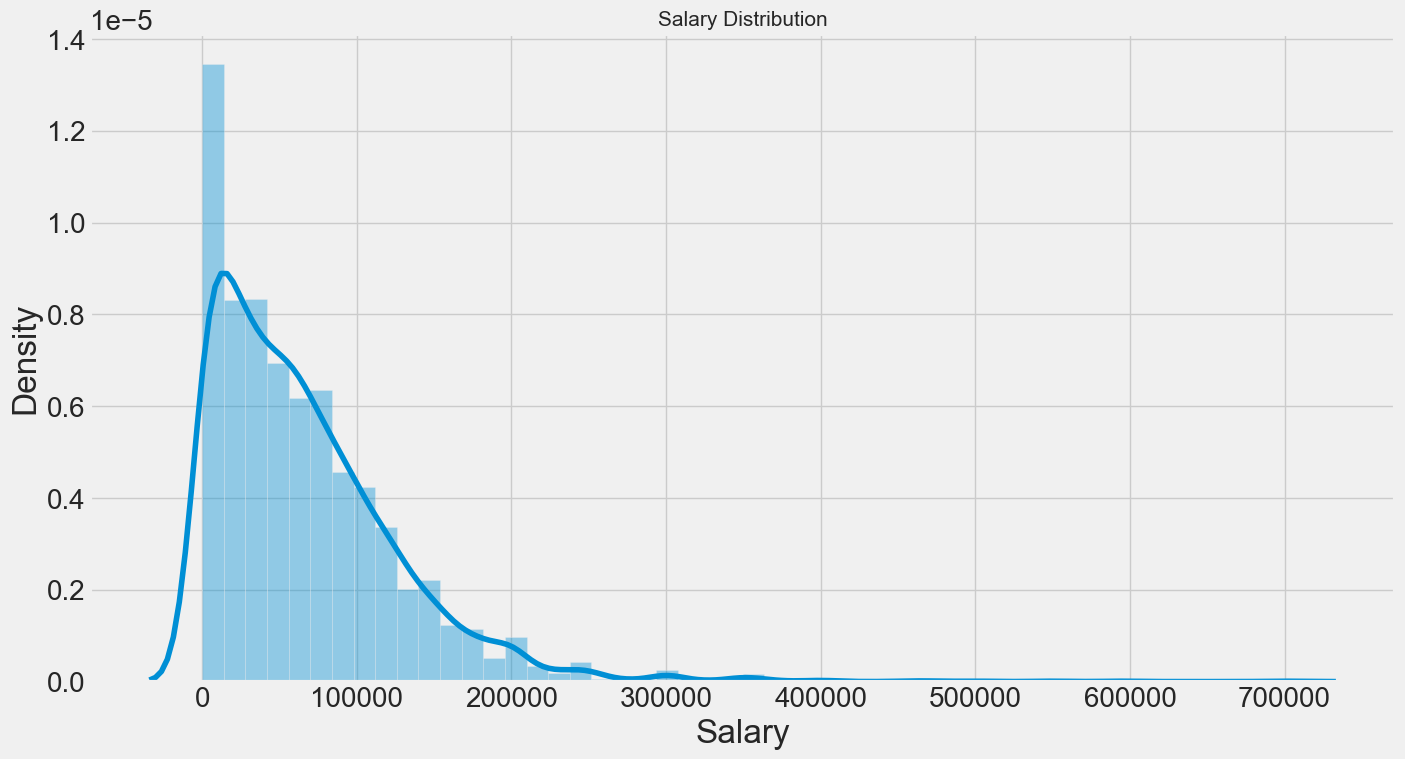

In [42]:
plt.subplots(figsize=(15,8))
salary = salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])

plt.title('Salary Distribution', size=15)
plt.show()

ValueError: Could not interpret input 'Salary'

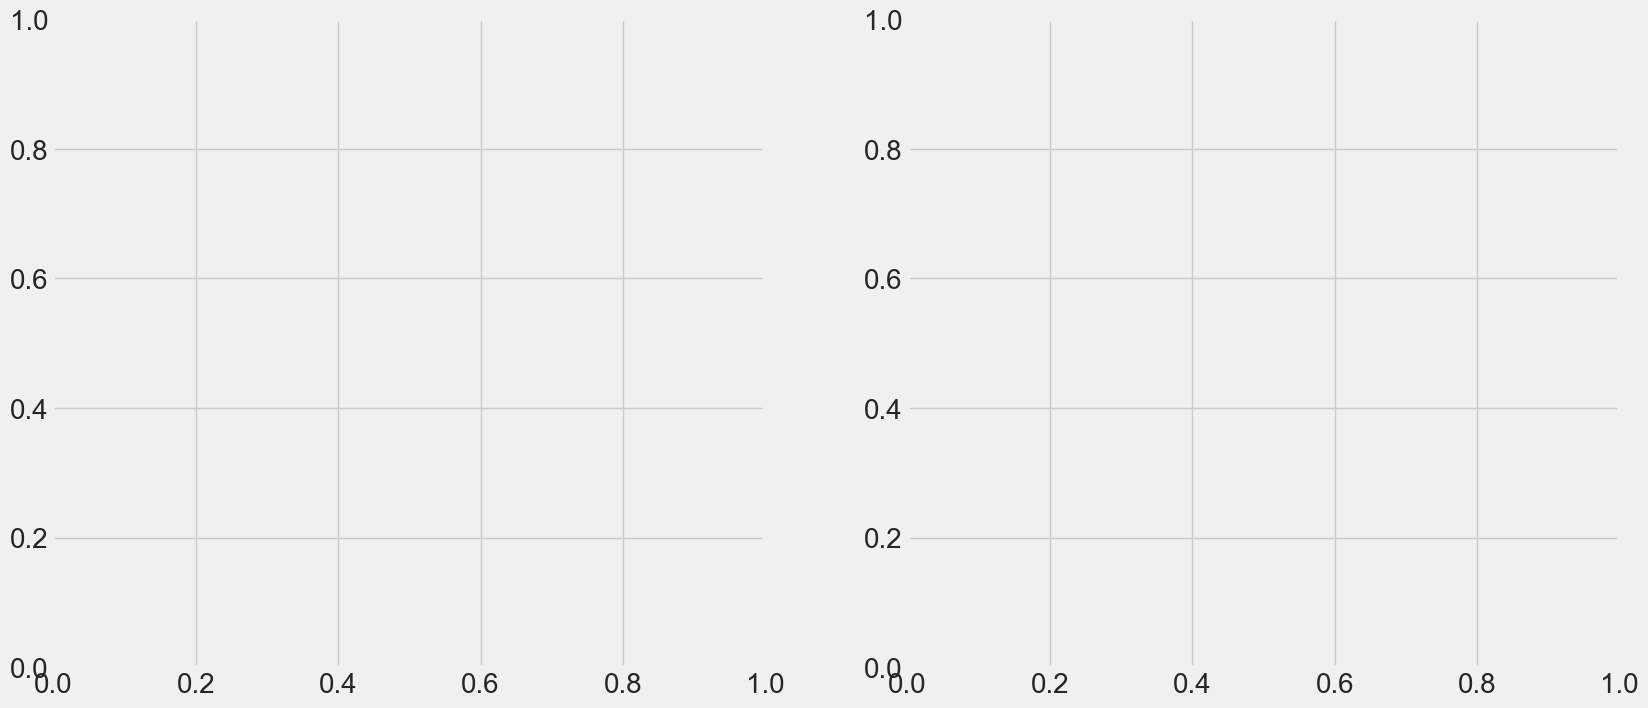

In [43]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary',)

In [53]:
salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary', sal_coun.index, data=sal_coun, palette='RdYlGn', ax=ax[0])
ax[0].axvline(salary['Salary'].median(), linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')

max_coun = salary.groupby('Country')['Salary'].median().to_frame()
max_coun = max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary', ascending=True).plot.barh(width=0.8, ax=ax[1], color=sns.color_palette('RdYlGn'))

ax[1].axvline(salary['Salary'].median(), linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

<Figure size 640x480 with 0 Axes>

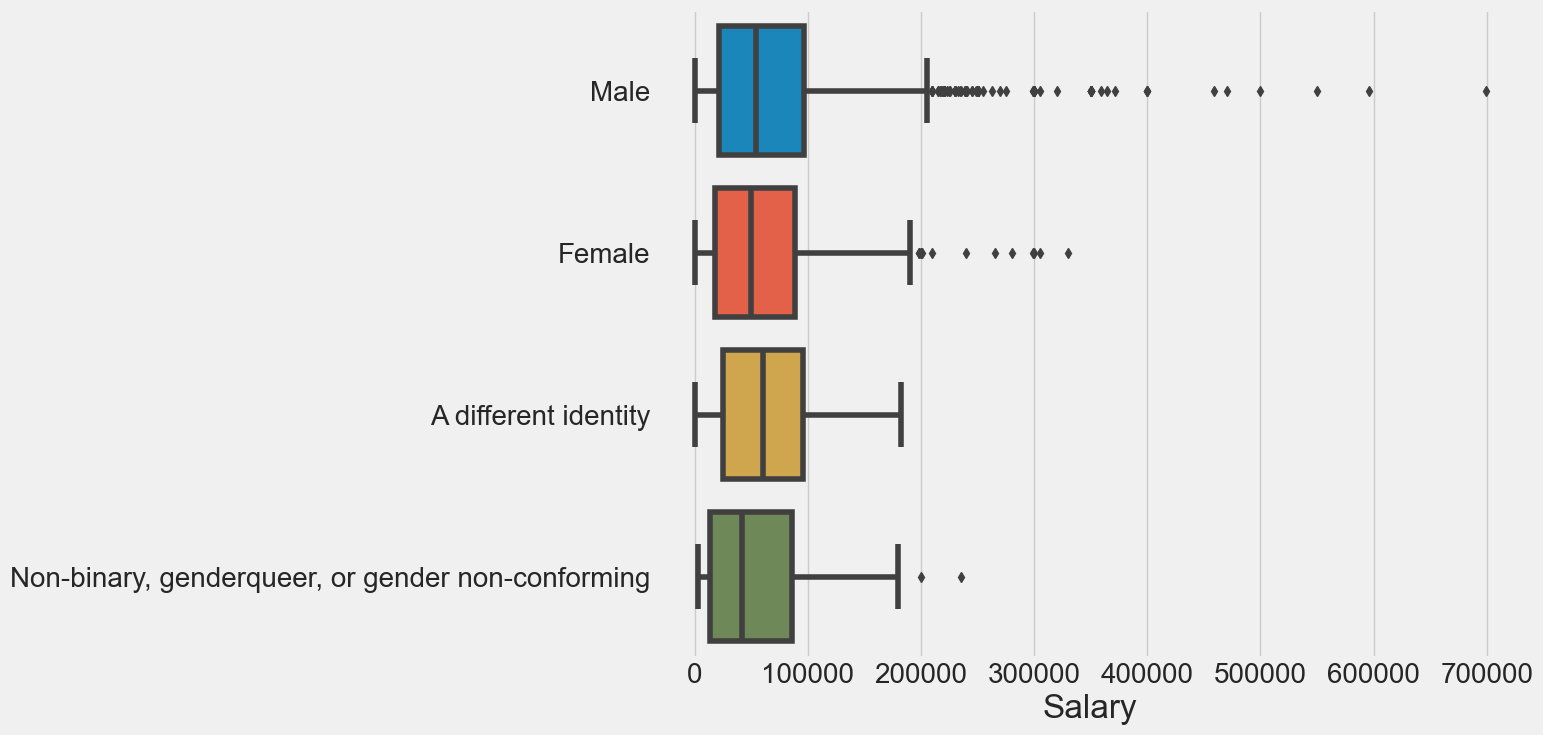

In [54]:
plt.subplots(figsize=(10,8))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)
plt.ylabel('')
plt.show()

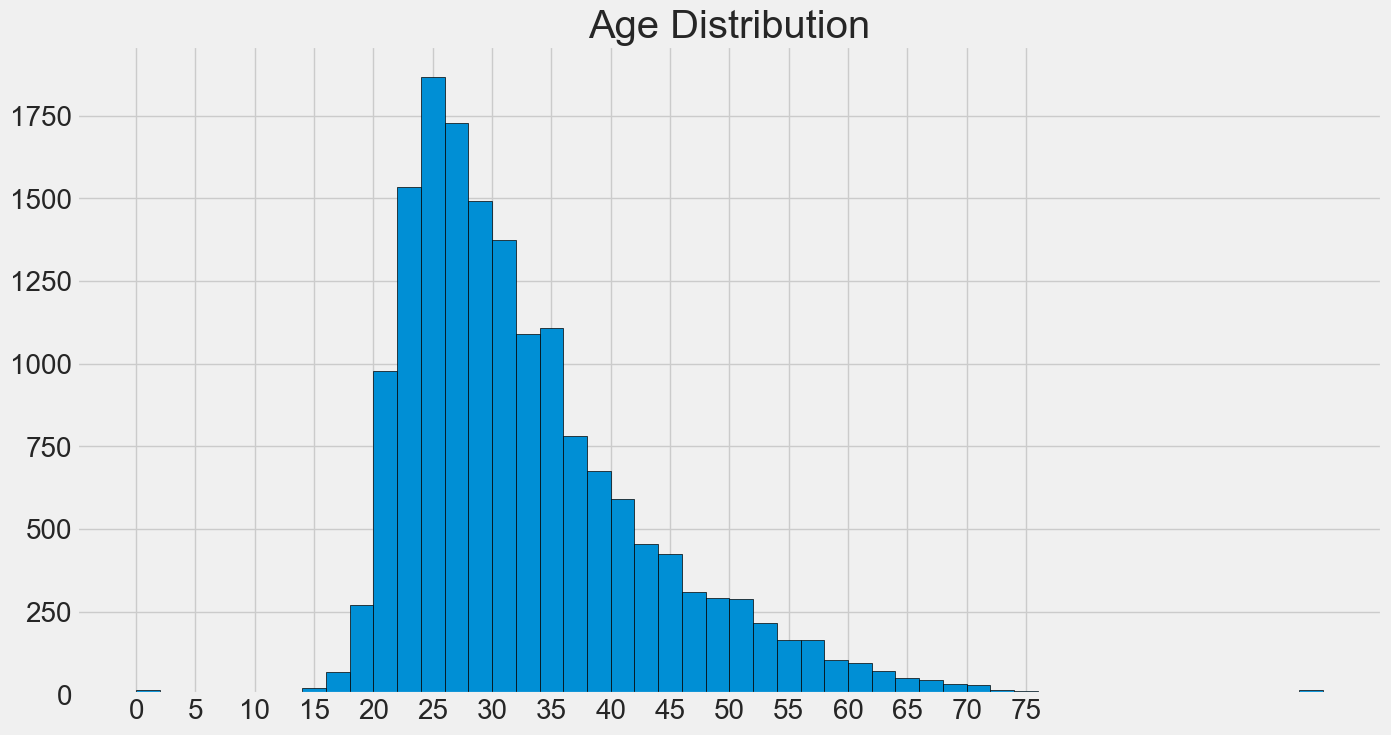

In [55]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50, edgecolor='black')
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show()

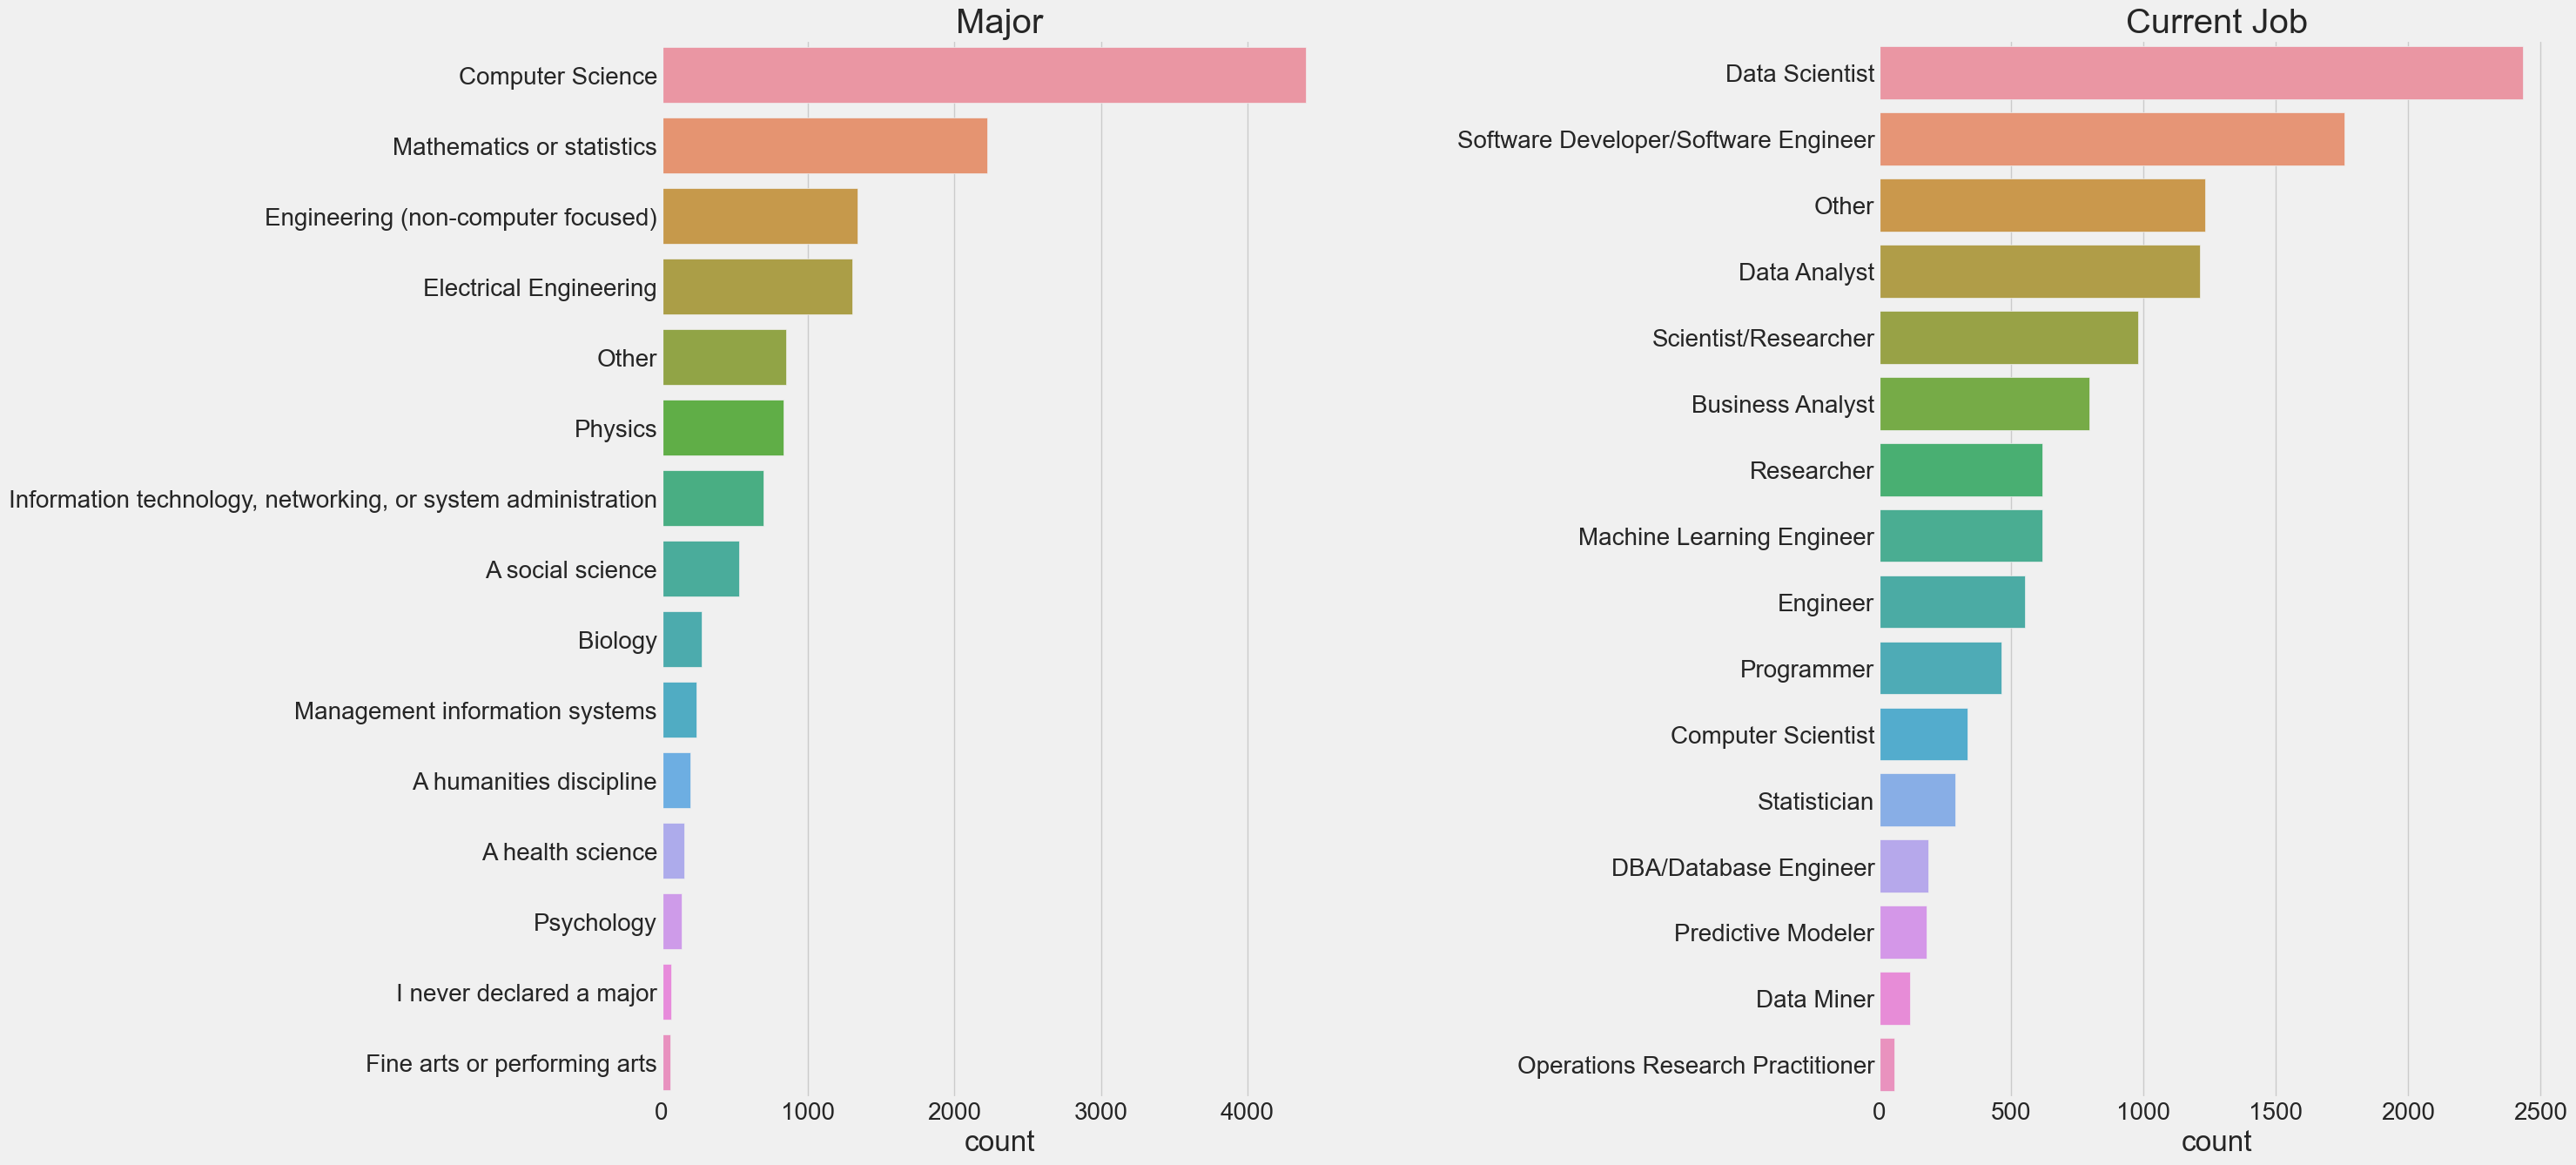

In [58]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=response['MajorSelect'], ax=ax[0], order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')

sns.countplot(y=response['CurrentJobTitleSelect'], ax=ax[1], order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

In [59]:
sal_job = salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary', ascending=False)

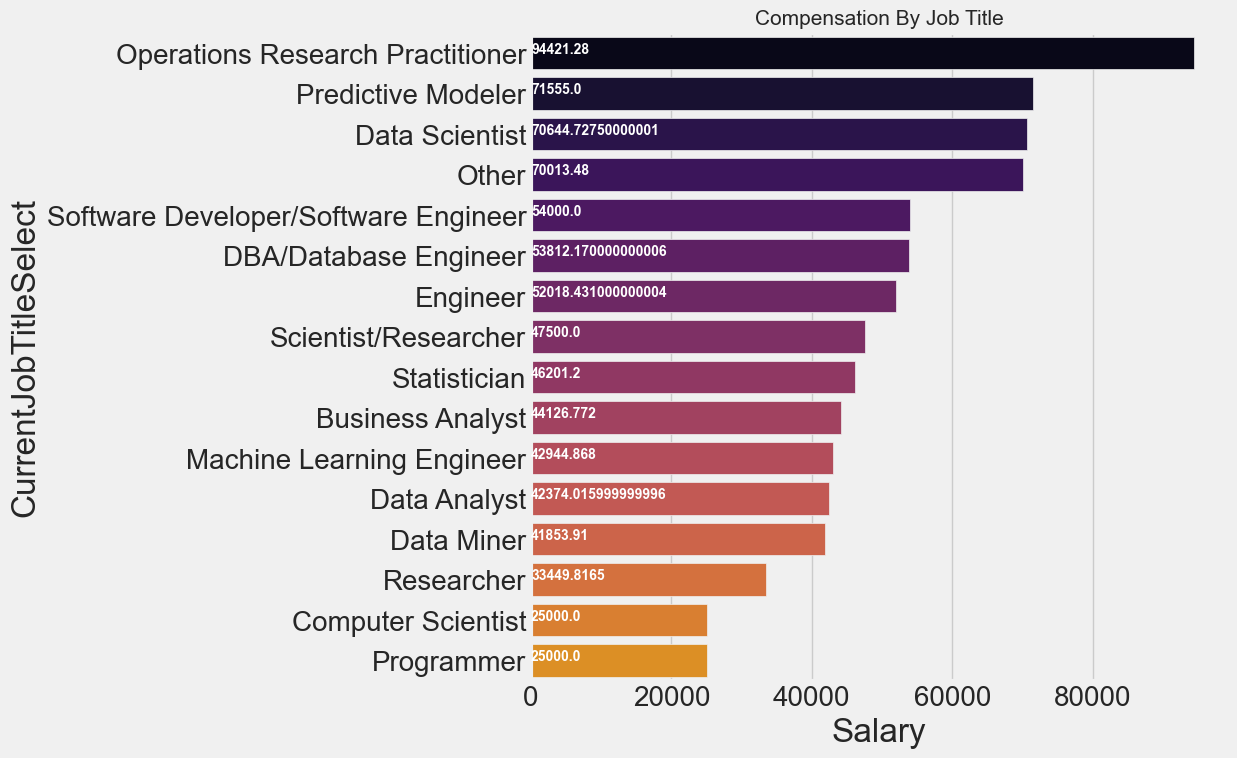

In [62]:
salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary', ascending =False)
ax = sns.barplot(sal_job.Salary, sal_job.index, palette=sns.color_palette('inferno',20))

plt.title('Compensation By Job Title', size=15)

for i, v in enumerate(sal_job.Salary):
    ax.text(.5, i, v, fontsize=10, color='white', weight='bold')
    
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [ ]:
f,ax = plt.subplots(1,2,figsize=(25,12))
skills = response['MLSkillsSelect'].str.split(',')
skills_set = []
for i in skills.dropna():
    skills_set.extend(i)